In [4]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

[[16.52810469 12.76546486]
 [13.80031442 11.93151544]
 [14.95747597 14.19269369]
 ...
 [ 7.50641288  6.31686769]
 [ 5.84131367  3.71619716]
 [ 7.7715489   3.37805926]]


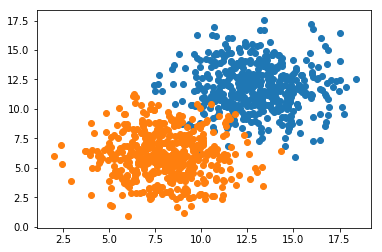

In [5]:
n_pts=500
np.random.seed(0)
Xa=np.array([np.random.normal(13,2,n_pts),
            np.random.normal(12,2,n_pts)]).T
#print(Xa)
Xb=np.array([np.random.normal(8,2,n_pts),
            np.random.normal(6,2,n_pts)]).T
#print(Xb)
X=np.vstack((Xa,Xb))
y=np.matrix(np.append(np.zeros(n_pts),np.ones(n_pts))).T
print(X)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

In [6]:
model=Sequential()
model.add(Dense(units=1,input_shape=(2,),activation='sigmoid'))
adam=Adam(lr=0.1)
model.compile(adam,loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit(x=X,y=y,verbose=1,batch_size=50,epochs = 500,shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 159us/step - loss: 1.4820 - acc: 0.5360
Epoch 2/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.6442 - acc: 0.5990
Epoch 3/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.4453 - acc: 0.8460
Epoch 4/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.3872 - acc: 0.8960
Epoch 5/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.3437 - acc: 0.9060
Epoch 6/500
1000/1000 [==============================] - 0s 19us/step - loss: 0.3108 - acc: 0.9250
Epoch 7/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.2915 - acc: 0.9310
Epoch 8/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2637 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.2371 - acc: 0.9580
Epoch 10/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2213 - acc: 0.9630
Epoch 11

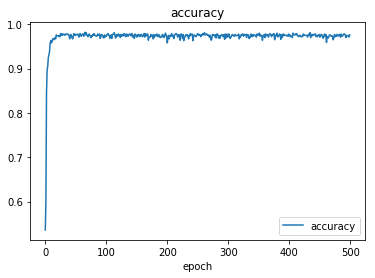

In [7]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

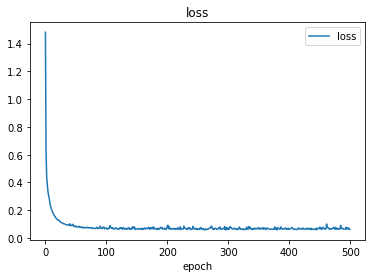

In [8]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [25]:
def plot_decision_boundary(X,y,model):
    x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)


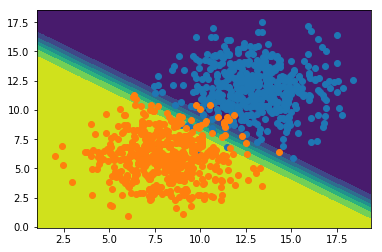

In [28]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

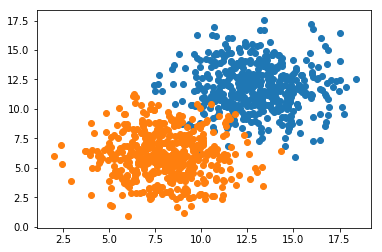